In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

In [5]:
data = pd.read_csv("/home/ajaykumar/ML/Bayesian/Bank.csv")
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


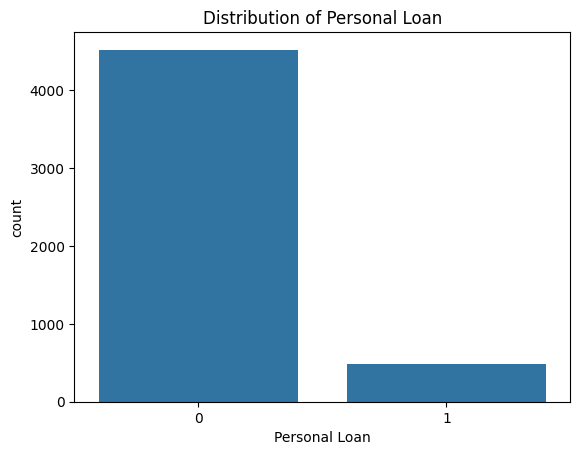

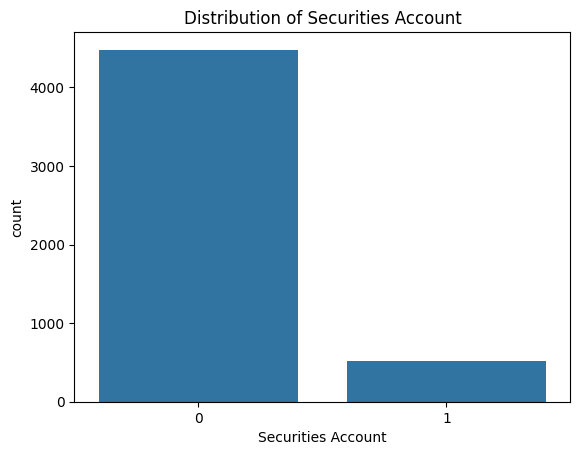

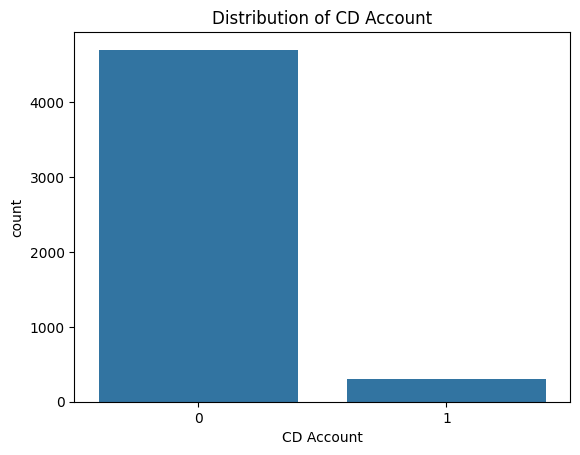

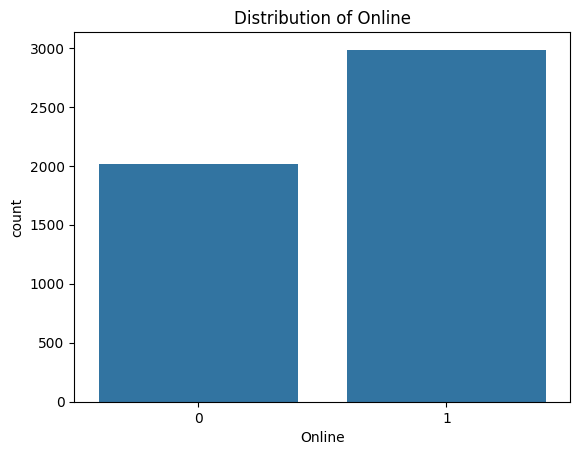

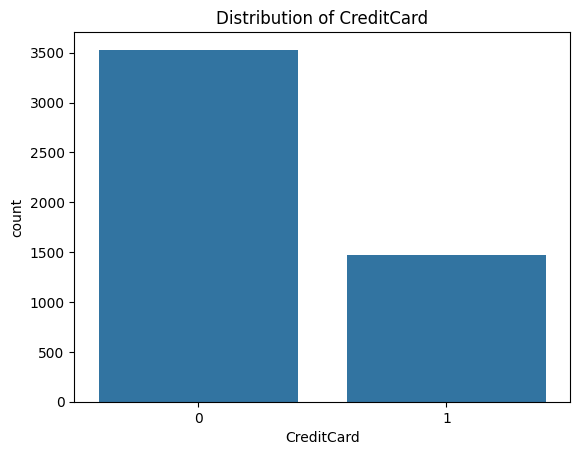

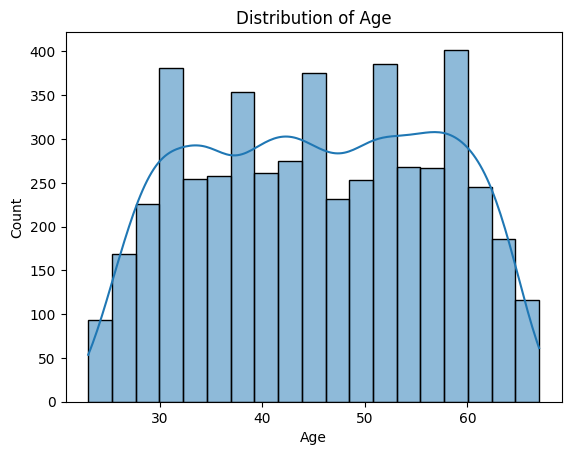

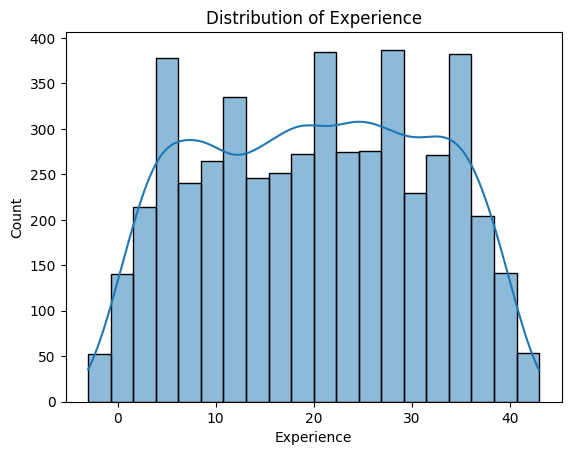

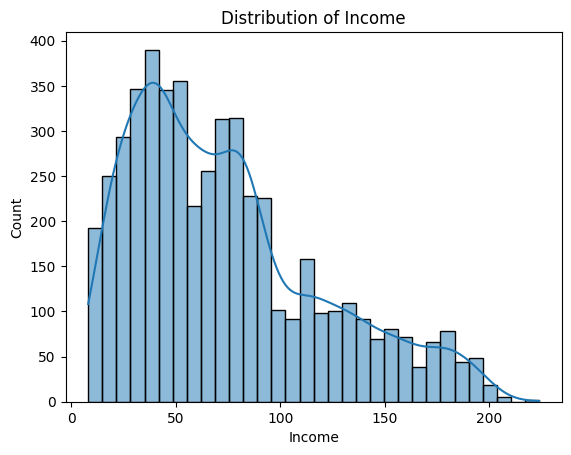

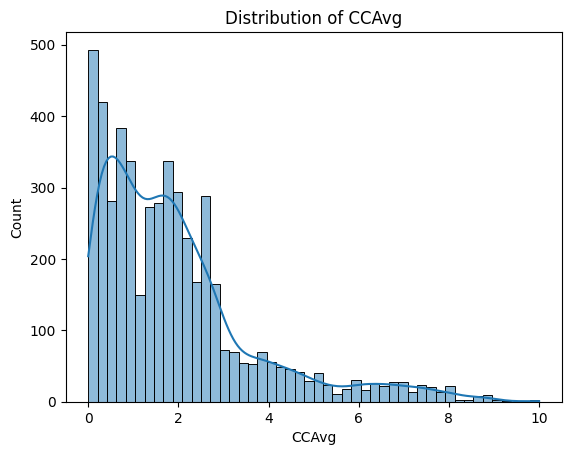

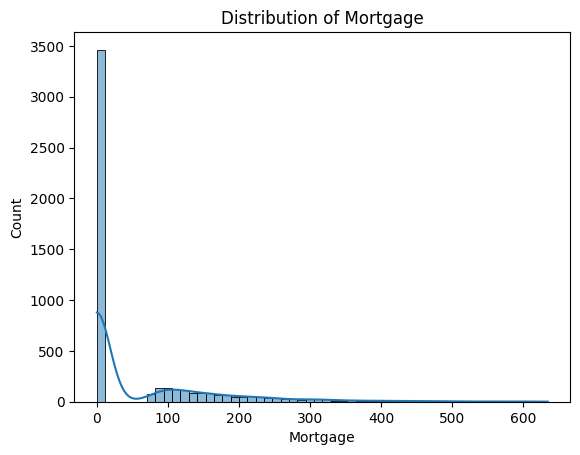

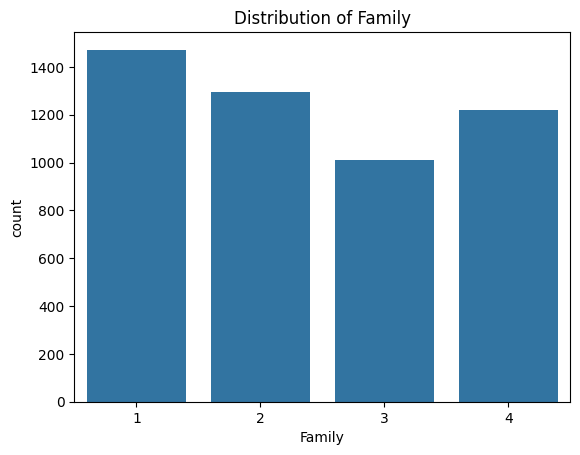

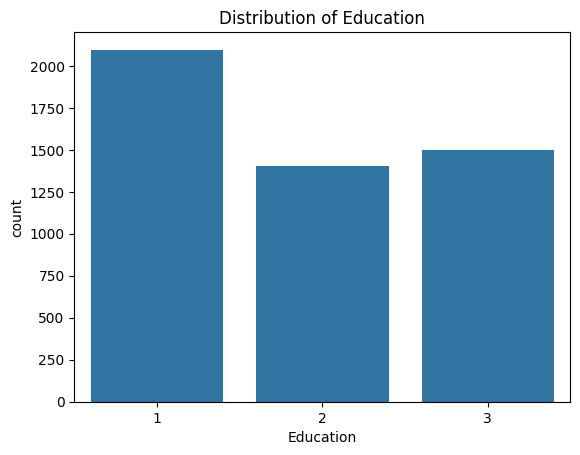

In [6]:
binary_vars = ['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for var in binary_vars:
    sns.countplot(x=var, data=data)
    plt.title(f'Distribution of {var}')
    plt.show()

# Plot distributions for interval variables
interval_vars = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for var in interval_vars:
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

# Plot distributions for ordinal variables
ordinal_vars = ['Family', 'Education']
for var in ordinal_vars:
    sns.countplot(x=var, data=data)
    plt.title(f'Distribution of {var}')
    plt.show()

In [7]:
data = pd.get_dummies(data,columns=['Family','Education'])
data

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,1,25,1,49,91107,1.6,0,0,1,0,0,0,False,False,False,True,True,False,False
1,2,45,19,34,90089,1.5,0,0,1,0,0,0,False,False,True,False,True,False,False
2,3,39,15,11,94720,1.0,0,0,0,0,0,0,True,False,False,False,True,False,False
3,4,35,9,100,94112,2.7,0,0,0,0,0,0,True,False,False,False,False,True,False
4,5,35,8,45,91330,1.0,0,0,0,0,0,1,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1.9,0,0,0,0,1,0,True,False,False,False,False,False,True
4996,4997,30,4,15,92037,0.4,85,0,0,0,1,0,False,False,False,True,True,False,False
4997,4998,63,39,24,93023,0.3,0,0,0,0,0,0,False,True,False,False,False,False,True
4998,4999,65,40,49,90034,0.5,0,0,0,0,1,0,False,False,True,False,False,True,False


In [8]:
req_col = [1,2,3,5,6,8,9,10,11,12,13,14,15,16,17,18]
X = data.iloc[:,req_col]
Y = data.iloc[:,7]
Z = data.iloc[:,1:4]

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
Z_train,Z_test,Y1_train,Y1_test = train_test_split(Z,Y,test_size=0.2,random_state=42)

In [10]:
clf = GaussianNB()
clf.fit(X_train,Y_train)

GaussianNB()

In [11]:
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test,Y_pred)
print(acc)
report = classification_report(Y_test,Y_pred)
print(report)

0.906
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       895
           1       0.55      0.63      0.58       105

    accuracy                           0.91      1000
   macro avg       0.75      0.78      0.77      1000
weighted avg       0.91      0.91      0.91      1000



In [12]:
clf2 = GaussianNB()
clf2.fit(Z_train,Y1_train)
Z_pred = clf2.predict(Z_test)
acc = accuracy_score(Y_test,Z_pred)
print(acc)

0.904


In [13]:
def loan_check(age,income,experience):
    input = pd.DataFrame({'Age':[age],'Experience':[experience],'Income':[income]})
    output = clf2.predict(input)
    if output == 1:
        return "Loan Approved"
    else:
        return "Loan Not Approved"


In [14]:
age = 35
income = 80000
experience = 10
Loan_msg = loan_check(age,income,experience)
print(Loan_msg)

Loan Not Approved
